# EE379K: Lab 2
## Group Members: Irfan Hasan (ih3976), Peter Zhang (yz7724)

## Question 1

-------------1a--------------
-----Correlation coefficients from pandas-----

          0         1         2         3
0  1.000000 -0.003998  0.990066  0.004111
1 -0.003998  1.000000 -0.004085 -0.990235
2  0.990066 -0.004085  1.000000  0.004067
3  0.004111 -0.990235  0.004067  1.000000

------ Heatmap from Seaborn -------



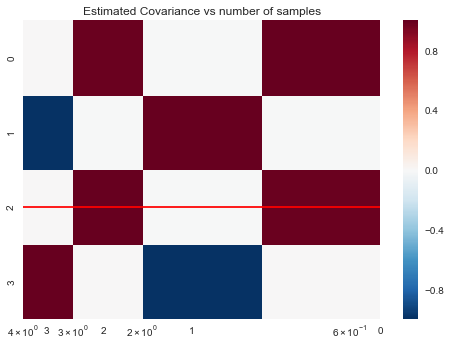


From the data it can be seen that the following columns are correlated: 
(0,2), (1,3)

--------- 1b ----------
Covariance matrix is the pairwise covariance between all the columns in the dataset

          0         1         2         3
0  1.001558 -0.004012  0.991624  0.004125
1 -0.004012  1.005378 -0.004099 -0.995457
2  0.991624 -0.004099  1.001589  0.004081
3  0.004125 -0.995457  0.004081  1.005168
The covariance matrix reflects the results seen in the plots. Specifically we can see that columns 0 and 2 and 1 and 3 have the highest covariance.


--------- 1c ----------
Choosen covariance:
[[ 3.   0.   0. ]
 [ 0.   1.5  0.5]
 [ 0.   0.5  6. ]]



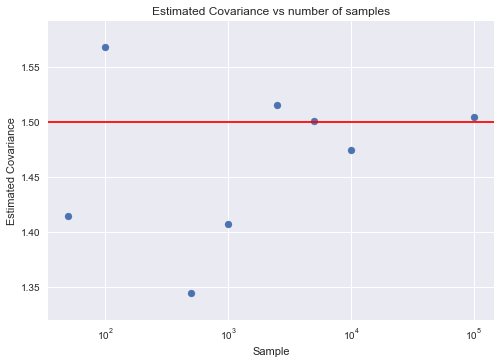

In [34]:
import pandas as pd
import seaborn as sns
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

df = pd.read_csv('Lab2_Data/DF1')
df = df.drop(df.columns[[0]], axis=1) 
corr = df.corr()
print("-------------1a--------------")
print("-----Correlation coefficients from pandas-----\n")
print(corr)

print("\n------ Heatmap from Seaborn -------\n")
sns.heatmap(corr)
plt.show()

print("\nFrom the data it can be seen that the following columns are correlated: ")
print("(0,2), (1,3)\n")

print("--------- 1b ----------")
print("Covariance matrix is the pairwise covariance between all the columns in the dataset\n")
print(df.cov())
print("The covariance matrix reflects the results seen in the plots. Specifically we can see that columns 0 and 2 and 1 and 3 have the highest covariance.\n")

print("\n--------- 1c ----------")
cov = [[3, 0, 0], [0, 1.5, 0.5], [0, 0.5, 6]]
print('Choosen covariance:\n{}\n'.format(np.matrix(cov)))
samples = [50, 100, 500, 1000, 2500, 5000, 10000, 100000]
res = []

for n in samples:
    sample = np.random.multivariate_normal([0,0,0], cov, n)
    estimated_cov = np.cov(sample, rowvar=False)
    res.append(estimated_cov[1][1])

fig = plt.figure()
ax = plt.gca()
ax.scatter(samples, res)
ax.set_xscale('log')
ax.set_title('Estimated Covariance vs number of samples')
plt.axhline(y=1.5, c='r')
plt.xlabel('Sample')
plt.ylabel('Estimated Covariance')
plt.show()

## Question 2

------ Original plot ------



/Users/irfanhasan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  import sys


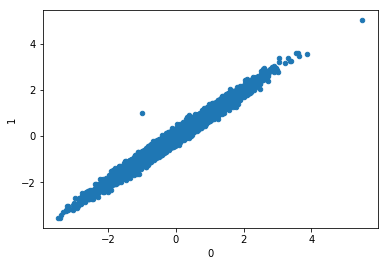


We used the MinMaxScaler as it would shrink the x and y axises to a range from 0 to 1.
We believe shrinking the x-axis especially will reveal the outlier which is more prominent on the y-axis.

----- Transformed plot ------



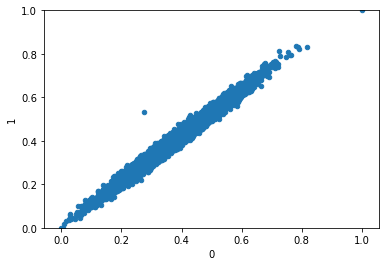

In [22]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

print('------ Original plot ------\n')
df2 = pd.read_csv('Lab2_Data/DF2')
df2 = df2.ix[:, 1:]
df2.plot.scatter(x='0', y='1')
plt.show()

scaler = MinMaxScaler()
df2_scale = scaler.fit_transform(df2)
df2_scaled = pd.DataFrame(data=df2_scale)

print('\nWe used the MinMaxScaler as it would shrink the x and y axises to a range from 0 to 1.')
print('We believe shrinking the x-axis especially will reveal the outlier which is more prominent on the y-axis.')
print('\n----- Transformed plot ------\n')
g = df2_scaled.plot.scatter(x=0, y=1)
g.set_ylim([0, 1])
plt.show()

## Question 3

In [1]:
import numpy as np

def calc_std_dev(n):
    deltas = []
    for i in range(n):
        X = np.random.randn(n)
        E = np.random.randn(n)
        y = -3 + np.dot(X, 0) + E
        beta_h = np.dot(X,y) / np.dot(X,X)
        deltas.append(beta_h)
    return np.std(deltas)

calc_std_dev(150)

0.24904452509546193

We can see that B_hat = -0.15 is not as significant since the empirical standard deviation of the error is much larger than 0.15, so the error accounts for all of it.

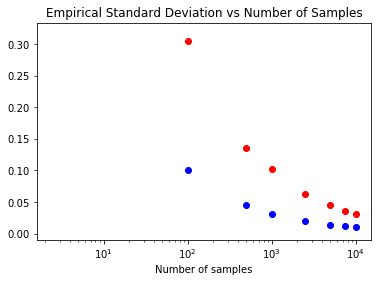

The fit is good.


In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt

def calc_std_dev(n):
    deltas = []
    for i in range(n):
        X = np.random.randn(n)
        E = np.random.randn(n)
        y = -3 + np.dot(X, 0) + E
        beta_h = np.dot(X,y) / np.dot(X,X)
        deltas.append(beta_h)
    return np.std(deltas)

samples =  [100, 500, 1000, 2500, 5000, 7500, 10000]
std_devs = []
one_over = []
for n in samples:
    std_dev = calc_std_dev(n)
    std_devs.append(std_dev)
    one_over.append(1/math.sqrt(n))

fig = plt.figure()
ax = plt.gca()
ax.scatter(samples, std_devs, c='r')
ax.scatter(samples, one_over, c='b')
ax.set_xscale('log')
ax.set_title('Empirical Standard Deviation vs Number of Samples')
plt.xlabel('Number of samples')
plt.show()
print('The fit is good.')

## Question 4

## Question 5